In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
dict1 = unpickle('/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_1')
dict2 = unpickle('/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_2')
dict3 = unpickle('/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_3')
dict4 = unpickle('/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_4')
dict5 = unpickle('/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_5')
test_dict = unpickle('/kaggle/input/cifar10-python/cifar-10-batches-py/test_batch')

In [5]:
for k, v in dict1.items():
    print(k)

b'batch_label'
b'labels'
b'data'
b'filenames'


In [6]:
all_labels_train = dict1[b'labels'] + dict2[b'labels'] + dict3[b'labels'] + dict4[b'labels']
len(all_labels_train)

40000

In [7]:
def convert_to_image_array(arr):
    # Reshape the array to (10000, 3, 32, 32)
    reshaped_arr = arr.reshape((arr.shape[0], 3, 32, 32))
    
    # Transpose to (10000, 32, 32, 3)
    transposed_arr = reshaped_arr.transpose(0, 2, 3, 1)
    
    return transposed_arr

In [8]:
arr1 = convert_to_image_array(dict1[b'data'])
arr2 = convert_to_image_array(dict2[b'data'])
arr3 = convert_to_image_array(dict3[b'data'])
arr4 = convert_to_image_array(dict4[b'data'])
arr5 = convert_to_image_array(dict5[b'data'])
test_arr = convert_to_image_array(test_dict[b'data'])

In [9]:
import numpy as np

combined_arr = np.concatenate((arr1, arr2, arr3, arr4), axis=0)
combined_arr.shape

(40000, 32, 32, 3)

In [10]:
from matplotlib import pyplot as plt
import random


def show_image(X, Y, num_img=5):
    random_indices = random.sample(range(len(X)), num_img)
    for index in random_indices:
        print(Y[index])
        plt.imshow(X[index])
        plt.show()
        print("-----------------------------------------------")

6


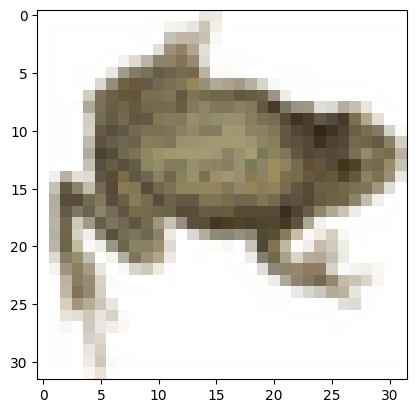

-----------------------------------------------
5


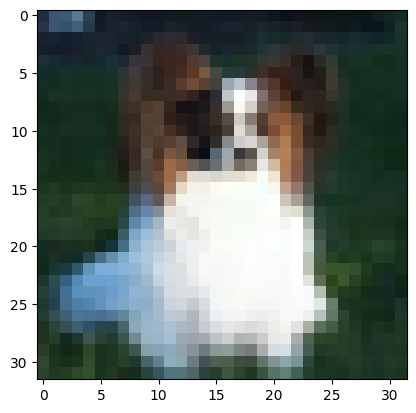

-----------------------------------------------
7


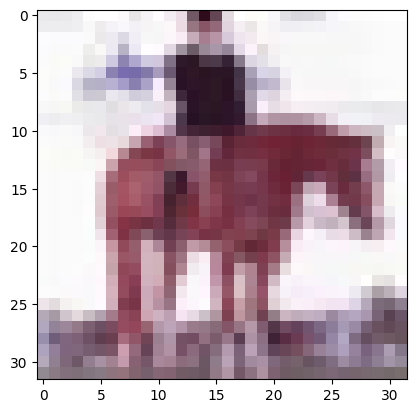

-----------------------------------------------
1


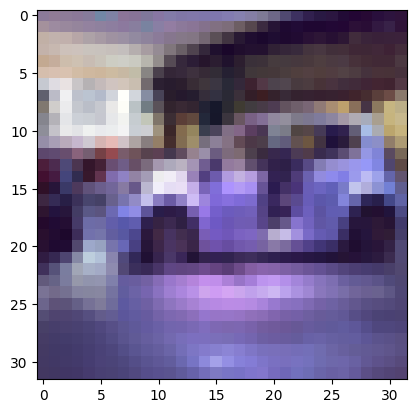

-----------------------------------------------
1


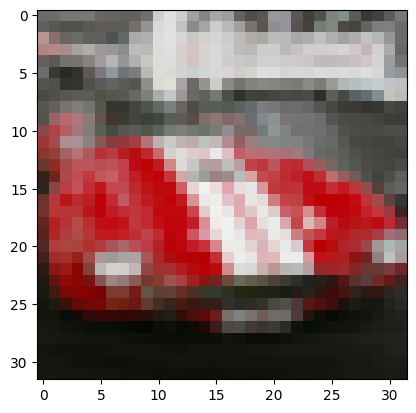

-----------------------------------------------


In [11]:
show_image(combined_arr, all_labels_train)

In [12]:
X_train = combined_arr
Y_train = np.array(all_labels_train)
X_val = convert_to_image_array(dict5[b'data'])
Y_val = np.array(dict5[b'labels'])
X_test = convert_to_image_array(test_dict[b'data'])
Y_test = np.array(test_dict[b'labels'])

In [13]:
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

(40000, 32, 32, 3) (40000,)
(10000, 32, 32, 3) (10000,)
(10000, 32, 32, 3) (10000,)


In [14]:
from keras.utils import to_categorical

num_classes = max(all_labels_train) + 1
print(num_classes)
Y_train_oneHot = to_categorical(Y_train, num_classes=num_classes)
Y_val_oneHot = to_categorical(Y_val, num_classes=num_classes)
Y_test_oneHot = to_categorical(Y_test, num_classes=num_classes)

Y_train_oneHot.shape, Y_val_oneHot.shape, Y_test_oneHot.shape

2024-07-08 09:01:21.226608: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-08 09:01:21.226712: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-08 09:01:21.365967: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


10


((40000, 10), (10000, 10), (10000, 10))

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
our_model = Sequential()

resNet50 = keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(32,32,3),
    pooling='avg',
    classes=num_classes,
)

for layer in resNet50.layers:
    layer.trainable = False

our_model.add(resNet50)
our_model.add(Flatten())
our_model.add(Dense(512, activation = "relu"))
Dropout(0.1)
our_model.add(Dense(128, activation = "relu"))
Dropout(0.1)
our_model.add(Dense(64, activation = "relu"))
Dropout(0.1)
our_model.add(Dense(num_classes, activation = "softmax"))

our_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [17]:
our_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [18]:
X_train.shape, Y_train_oneHot.shape

((40000, 32, 32, 3), (40000, 10))

In [19]:
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0
X_val_norm = X_val / 255.0

In [20]:
Y_train_oneHot[10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [21]:
epochs = 500
batch_size=32

early_stop = EarlyStopping(monitor='val_loss',  
                           patience=5,         
                           restore_best_weights=True)

history = our_model.fit(X_train_norm, Y_train_oneHot,
                        validation_data = (X_val_norm, Y_val_oneHot),
                        epochs=epochs,
                        batch_size=batch_size,
                        callbacks=[early_stop],
                       verbose=1)

Epoch 1/500
  10/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.1236 - loss: 2.7615 

I0000 00:00:1720429313.951938     132 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1720429314.002737     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1691 - loss: 2.2015

W0000 00:00:1720429328.130632     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1720429333.872547     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.1692 - loss: 2.2013 - val_accuracy: 0.2397 - val_loss: 1.9890
Epoch 2/500
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.2769 - loss: 1.9406 - val_accuracy: 0.3087 - val_loss: 1.8670
Epoch 3/500
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3007 - loss: 1.8911 - val_accuracy: 0.3316 - val_loss: 1.8197
Epoch 4/500
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3214 - loss: 1.8486 - val_accuracy: 0.3515 - val_loss: 1.7898
Epoch 5/500
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3414 - loss: 1.8030 - val_accuracy: 0.3442 - val_loss: 1.7759
Epoch 6/500
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3525 - loss: 1.7847 - val_accuracy: 0.3448 - val_loss: 1.7759
Epoch 7/500
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3596 - loss: 1.7622 - val_accuracy: 0.3547 - val_loss: 1.7935
Epoch 8/500
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3653 - loss: 1.74

In [22]:
test_loss, test_accuracy = our_model.evaluate(X_test_norm, Y_test_oneHot, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4245 - loss: 1.5965
Test Loss: 1.6020623445510864
Test Accuracy: 0.4207000136375427
